In [17]:
from __future__ import division

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
#matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

import os, glob
import corner
import acor
import numpy as np

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from pulsar_gibbs import PTABlockGibbs
import model_definition

In [19]:
import enterprise
from enterprise.pulsar import Pulsar
from enterprise.signals import parameter
from enterprise.signals import signal_base
import enterprise.signals.signal_base as base
from enterprise.signals import white_signals
from enterprise.signals import gp_signals
from enterprise.signals import utils

import enterprise_extensions as ee
from enterprise_extensions import models, model_utils, blocks

In [4]:
epsr = Pulsar('J1713+0747.par',
              'J1713+0747.tim')

[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 


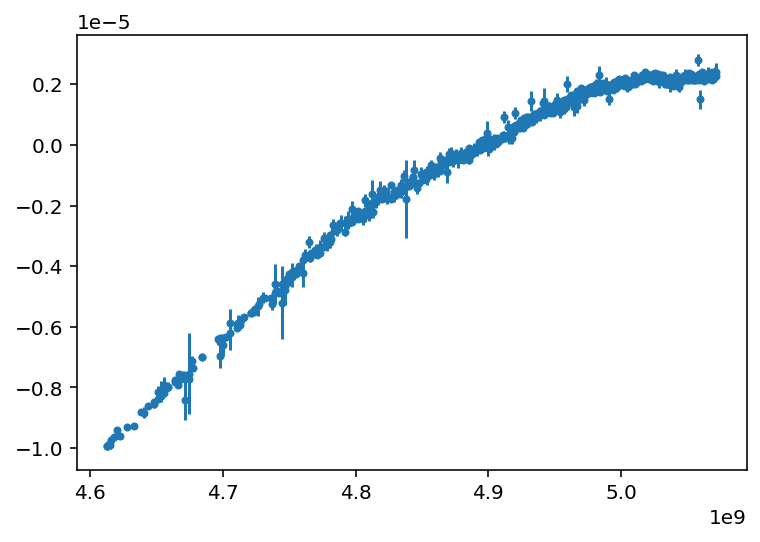

In [5]:
plt.errorbar(epsr.toas, epsr.residuals, epsr.toaerrs, fmt='.');

In [21]:
##### parameters and priors #####

# Uniform prior on EFAC
efac = parameter.Constant(1.0)
ef = white_signals.MeasurementNoise(efac=efac)

# red noise 
rn = blocks.common_red_noise_block(psd='spectrum', components=30, name='gw')

# timing model
tm = gp_signals.TimingModel(use_svd=True)

# full model is sum of components
model = ef + rn + tm

# initialize PTA
pta = signal_base.PTA([model(epsr)])

In [22]:
gibbs = PTABlockGibbs(pta=pta, hypersample='conditional', ecorrsample='mh', psr=epsr)

ERROR: Gibbs outlier analysis must use basis_ecorr, not kernel ecorr


In [23]:
x0 = np.concatenate([p.sample().flatten() for p in gibbs.params])

In [24]:
if gibbs.get_ecorr_indices().size != 1:
    print('ok')

ok


In [25]:
gibbs.sample(x0, outdir='./gibbs_1713sim/', 
             niter=10000, resume=False)

Creating chain directory: ./gibbs_1713sim/
Finished 99 percent in 81.603 seconds..

In [26]:
chain = np.loadtxt('./gibbs_1713sim/chain.txt')

In [28]:
for ii in range(30):
    print(acor.acor(chain[100:,ii])[0])

4.252991588016285
1.0514801851718536
1.6387920798133548
13.96029424235001
10.369220774891089
2.7454245339971597
8.537478421292391
4.1842782939894985
5.373657173148977
4.660288981550915
5.927106055252965
4.973415135101724
4.590370187633255
16.40109307480614
8.677314091263403
5.709280907022412
6.891352551120242
7.000086691412192
3.86741586545879
2.969258353856533
3.0887182506881246
2.893333463144192
4.018074697684064
3.7939490692415783
5.439143269761273
2.4728041385275756
5.242051364130827
3.5977992688891707
7.221742653117613
2.975762053869277
